In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')



In [86]:
Ball_by_Ball=pd.read_csv("/Users/ankitmishra/Desktop/archive/IPL Ball-by-Ball 2008-2020.csv")
matches=pd.read_csv("/Users/ankitmishra/Desktop/archive/IPL Matches 2008-2020.csv")

In [87]:
Ball_by_Ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [88]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [89]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [90]:
Ball_by_Ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [91]:
Ball_by_Ball.shape

(193468, 18)

In [92]:
matches.shape

(816, 17)

In [93]:
Ball_by_Ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [94]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [95]:
matches['Season'] = pd.DatetimeIndex(matches['date']).year  #EXTRACT YEAR FROM DATE

In [96]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [97]:
all_data=Ball_by_Ball.merge(matches[['id','Season','winner']],left_on='id',right_on='id',how='inner')
all_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,Season,winner
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,Kolkata Knight Riders
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,Kolkata Knight Riders
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,Kolkata Knight Riders
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,Kolkata Knight Riders
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,Kolkata Knight Riders


In [98]:
print("Total number of matches :",matches.shape[0])


Total number of matches : 816


In [99]:
print("\n Cities played at :",matches['city'].unique())


 Cities played at : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [100]:
print("Total number of teams :",matches['team1'].unique())

Total number of teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


# Matches in Every Season

In [101]:
match_per_season=matches.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


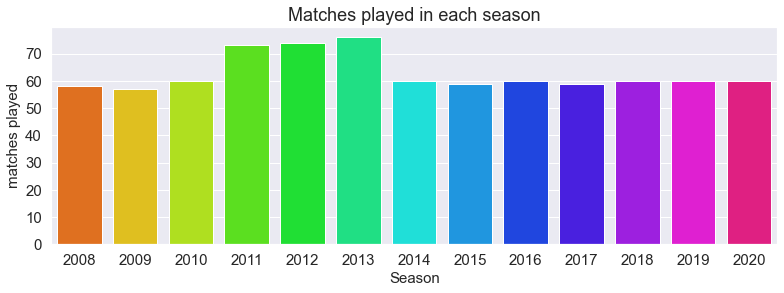

In [102]:
sns.set_style('darkgrid')
plt.figure(figsize=(13,4))
sns.countplot(x='Season',data=matches,palette='hsv')
plt.xlabel('Season',fontsize=15)
plt.ylabel('matches played',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches played in each season',fontsize=18)

plt.show()

### The venue that hosted the maximum number of matches


In [103]:
venue_ser = matches['venue'].value_counts()

venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [104]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


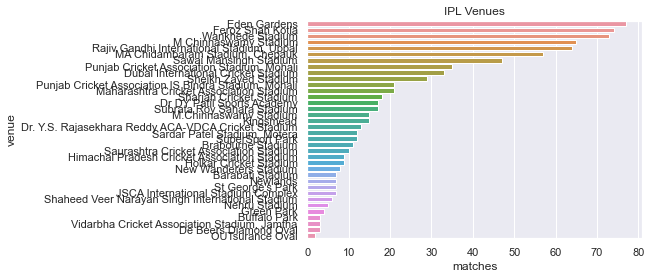

In [105]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [106]:
teams_per_season = matches.groupby('Season')['winner'].value_counts()
teams_per_season

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2020    Kolkata Knight Riders           7
        Royal Challengers Bangalore     7
        Chennai Super Kings             6
        Kings XI Punjab                 6
        Rajasthan Royals                6
Name: winner, Length: 108, dtype: int64

In [107]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1  

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)
((2020, 'Mumbai Indians'), 11)


In [108]:
win_per_season_df


,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


### number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

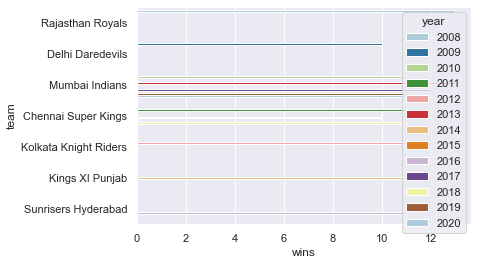

In [109]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');


observation : Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

## The most successful IPL team


In [110]:
team_wins_ser = matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

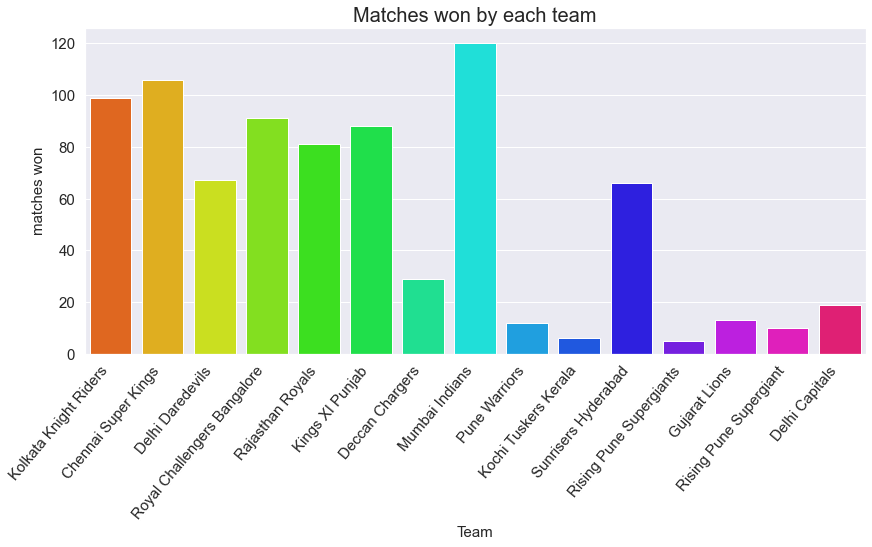

In [111]:
# number of matches won by each team
plt.figure(figsize=(14,6))
sns.countplot(x='winner',data=matches,palette='hsv')
plt.xlabel('Team',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Matches won by each team',fontsize=20)

plt.show()

Observations:
Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -120) followed by Chennai Super Kings and Kolkata Knight Riders.


## Most Valuable Player


In [112]:
#The player who has won the player_of_match title on most occasions is the most valuable player.

In [113]:
mvp_ser = matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  

In [114]:
mvp_ten_df

,player,wins
0,AB de Villiers,23
1,CH Gayle,22
2,RG Sharma,18
3,DA Warner,17
4,MS Dhoni,17
5,SR Watson,16
6,YK Pathan,16
7,SK Raina,14
8,V Kohli,13
9,G Gambhir,13


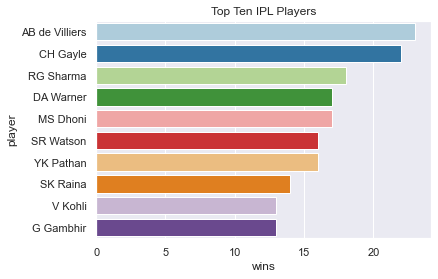

In [115]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

Observations:
AB de Villiers is the player who won the most player of the match awards and hence is the most valuable player.
Six Indian players have figured in the top ten IPL players list.

# The team that won the most number of toss


In [116]:
toss_ser = matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [117]:
toss_df


,team,wins
0,Mumbai Indians,106
1,Kolkata Knight Riders,98
2,Chennai Super Kings,97
3,Royal Challengers Bangalore,87
4,Rajasthan Royals,87
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,57
8,Deccan Chargers,43
9,Pune Warriors,20


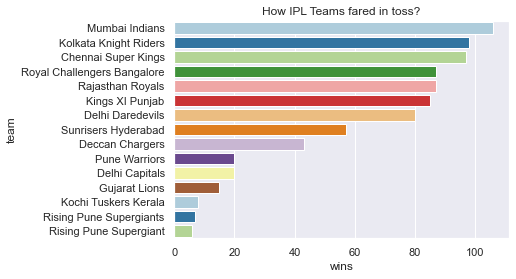

In [118]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

Observations:
Mumbai Indians has won the most toss(till 2020) in IPL history.

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

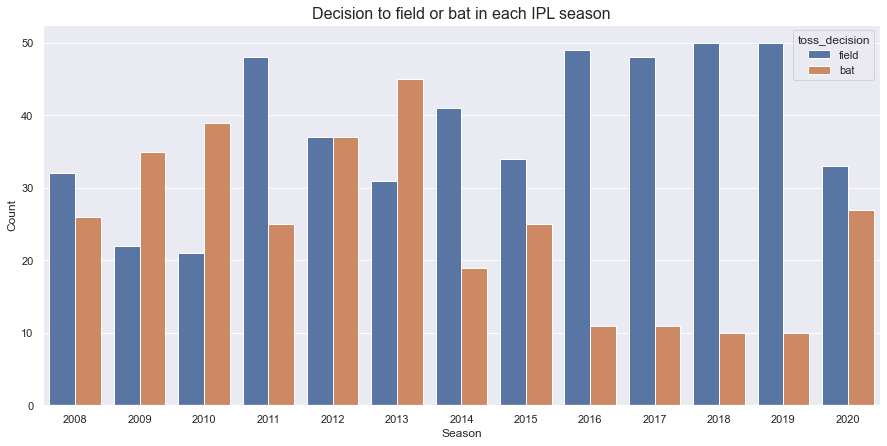

In [119]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              hue='toss_decision',
              data=matches,
              order = matches['Season'].value_counts().index.sort_values(),
              palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

We can see a trend that, decisions to field are more from IPL-2016 Season

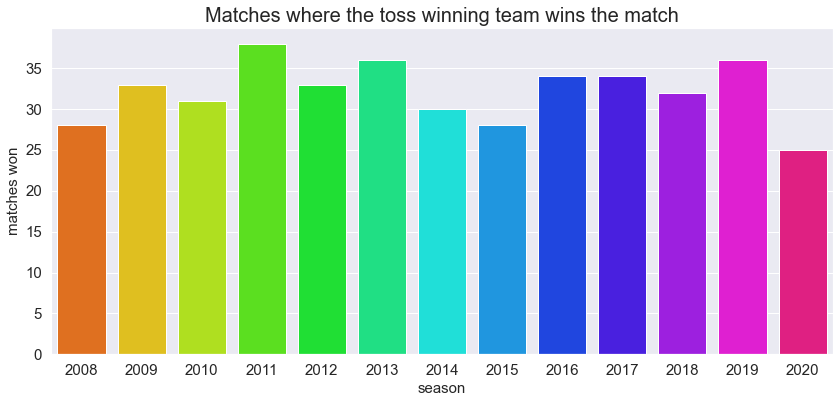

In [120]:
# number of matches where the toss wining team wins the match
plt.figure(figsize=(14,6))
sns.countplot(x='Season',data=matches[matches['toss_winner']==matches['winner']],palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches where the toss winning team wins the match',fontsize=20)
plt.show()

All the top teams in IPL are successful in winning the toss as well.

# Q: Does winning the toss has any advantage?


In [121]:
win_count = 0
for index, value in matches.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(matches)
print('The probability of winning if won the toss: {:.2f}' .format(prob)) 

The number of times the team winning toss have won: 418
The probability of winning if won the toss: 0.51


The probability of winning when the team had won the toss is approx 51%. So winning toss gives a slight edge over the opponent.

# BATING STAT

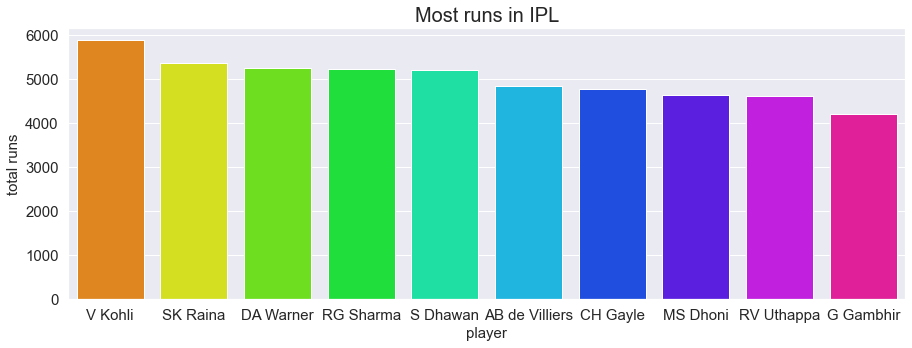

In [122]:
most_runs=Ball_by_Ball.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
most_runs=most_runs.to_frame().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='batsman',y='batsman_runs',data=most_runs.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('total runs',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most runs in IPL',fontsize=20) 
plt.show()

In [123]:
most_runs_season=all_data.groupby(['Season','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_season=most_runs_season.to_frame().reset_index()
most_runs_season=most_runs_season.sort_values(by=['Season','batsman_runs'],ascending=False)
most_runs_season=most_runs_season.drop_duplicates(['Season'],keep='first')
most_runs_season

,Season,batsman,batsman_runs
9,2020,KL Rahul,670
6,2019,DA Warner,692
2,2018,KS Williamson,735
12,2017,DA Warner,641
0,2016,V Kohli,973
25,2015,DA Warner,562
10,2014,RV Uthappa,660
4,2013,MEK Hussey,733
3,2012,CH Gayle,733
17,2011,CH Gayle,608


In [124]:
# most runs in a match
most_runs_match=all_data.groupby(['id','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_match=most_runs_match.to_frame().reset_index()
most_runs_match[:10]

,id,batsman,batsman_runs
0,598027,CH Gayle,175
1,335982,BB McCullum,158
2,829795,AB de Villiers,133
3,1216510,KL Rahul,132
4,980987,AB de Villiers,129
5,548372,CH Gayle,128
6,1136602,RR Pant,128
7,419137,M Vijay,127
8,1082627,DA Warner,126
9,734047,V Sehwag,122


# FOUR

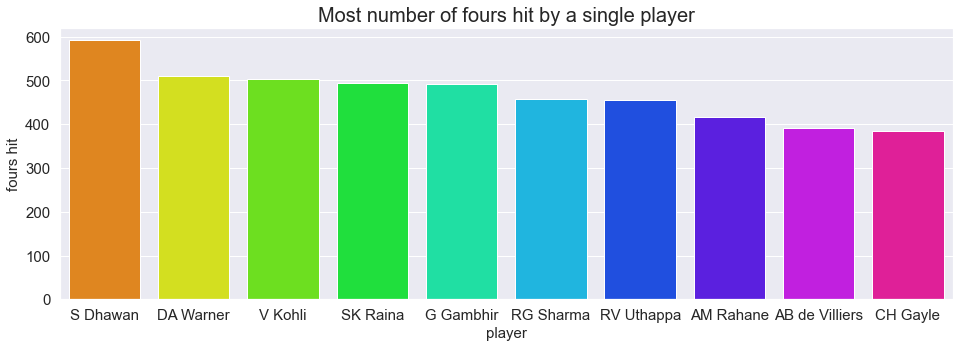

In [125]:
fours_hit=Ball_by_Ball[Ball_by_Ball['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
fours_hit=fours_hit.to_frame().reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='batsman',y='batsman_runs',data=fours_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of fours hit by a single player',fontsize=20) 
plt.show()

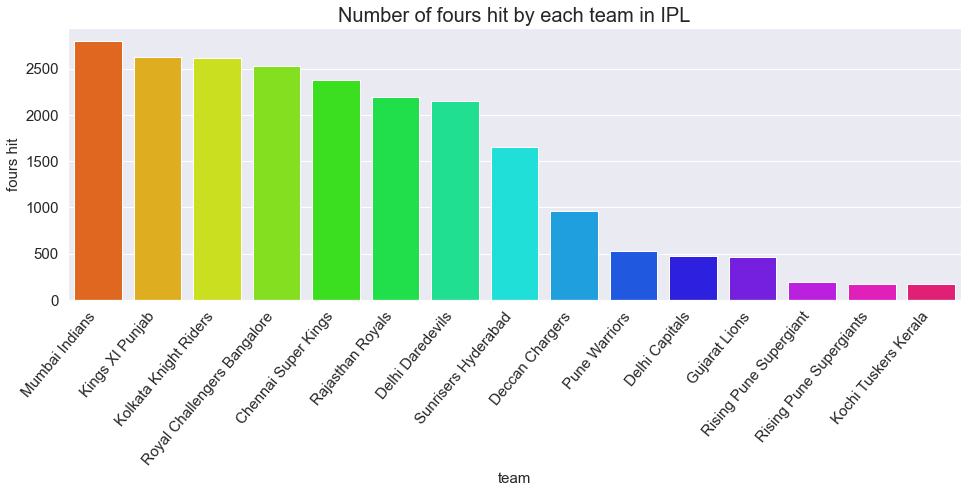

In [126]:
fours_team=Ball_by_Ball[Ball_by_Ball['batsman_runs']==4].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
fours_team=fours_team.to_frame().reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='batting_team',y='batsman_runs',data=fours_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of fours hit by each team in IPL',fontsize=20) 
plt.show()

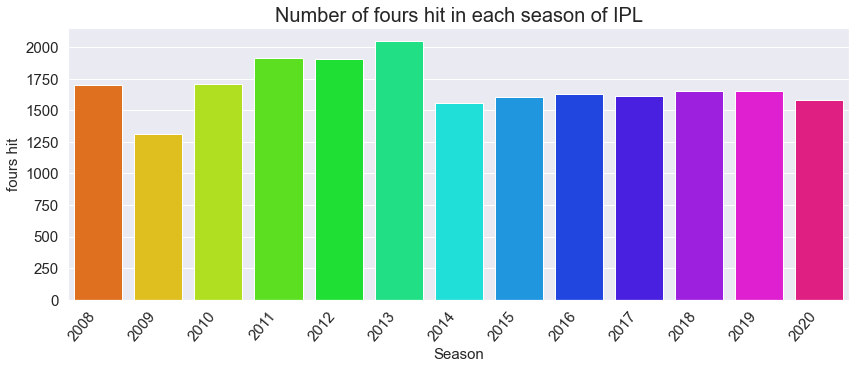

In [127]:
four_season=all_data[all_data['batsman_runs']==4].groupby('Season')['batsman_runs'].count().sort_values(ascending=False)
four_season=four_season.to_frame().reset_index()

plt.figure(figsize=(14,5))
sns.barplot(x='Season',y='batsman_runs',data=four_season,palette='hsv')
plt.xlabel('Season',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of fours hit in each season of IPL',fontsize=20) 
plt.show()

# sixes

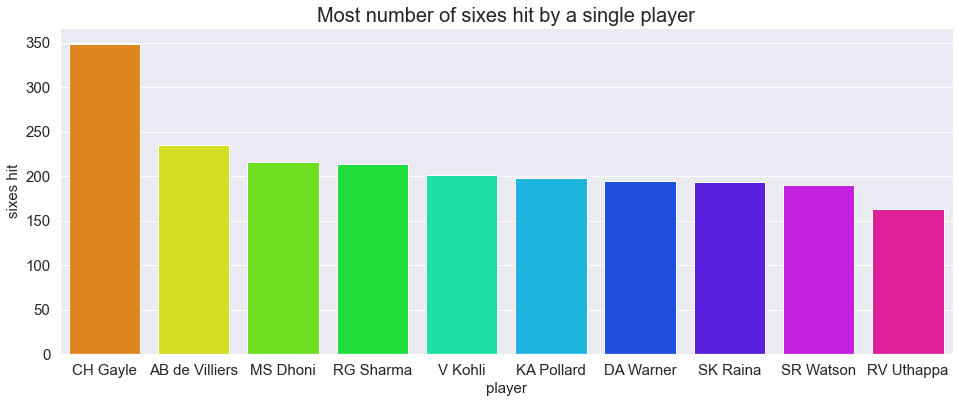

In [128]:
sixes_hit=Ball_by_Ball[Ball_by_Ball['batsman_runs']==6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
sixes_hit=sixes_hit.to_frame().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='batsman',y='batsman_runs',data=sixes_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of sixes hit by a single player',fontsize=20) 
plt.show()

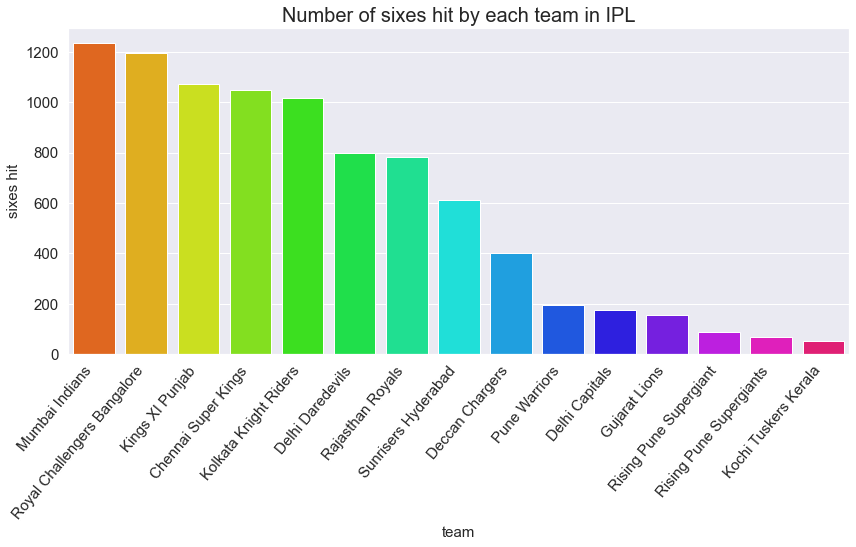

In [129]:
sixes_team=Ball_by_Ball[Ball_by_Ball['batsman_runs']==6].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
sixes_team=sixes_team.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='batting_team',y='batsman_runs',data=sixes_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of sixes hit by each team in IPL',fontsize=20) 
plt.show()

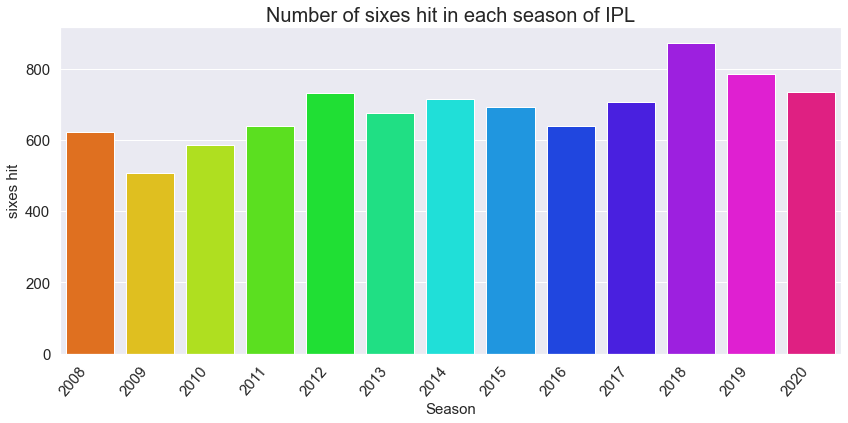

In [130]:
sixes_season=all_data[all_data['batsman_runs']==6].groupby('Season')['batsman_runs'].count().sort_values(ascending=False)
sixes_season=sixes_season.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='Season',y='batsman_runs',data=sixes_season,palette='hsv')
plt.xlabel('Season',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of sixes hit in each season of IPL',fontsize=20) 
plt.show()

# Which batsman has been most consistent among top 10 run getters?


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

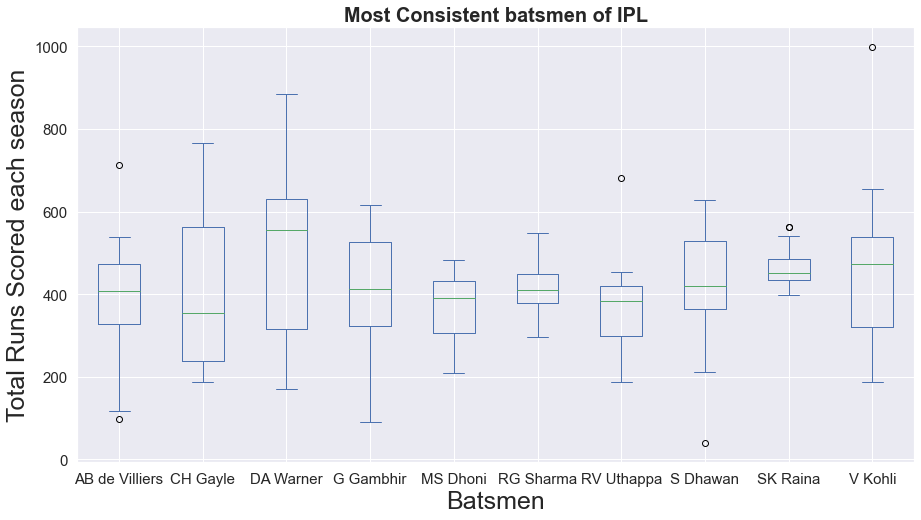

In [131]:
consistent_batsman = all_data[all_data.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','Season','total_runs']]

consistent_batsman.groupby(['Season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across all seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

# Batsmen who have maintained a healthy average over the years?


In [132]:
#Players with highest batting average in IPL who have played 10 or 11 seasons?
no_of_matches = pd.DataFrame(all_data.groupby('batsman')['id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(all_data.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(all_data.groupby('batsman')['Season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'match':no_of_matches['id'],'run':runs['batsman_runs'],'Season':seasons['Season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['run']/batsman_df['match']
highest_avg = batsman_df[batsman_df['Season'].isin([10,11])][['Season','batsman','batting_average']].sort_values(by = 'batting_average',
                                                                                        ascending = False).head(10)

highest_avg

,Season,batsman,batting_average
116,11,DA Warner,37.000000
154,11,G Gambhir,27.927152
77,11,BB McCullum,26.422018
270,11,M Vijay,24.942857
55,11,AT Rayudu,24.557047
37,10,AJ Finch,23.588235
535,11,Yuvraj Singh,21.825397
220,11,KA Pollard,20.993056
291,10,MK Tiwary,20.421687
273,10,MA Agarwal,20.361446


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

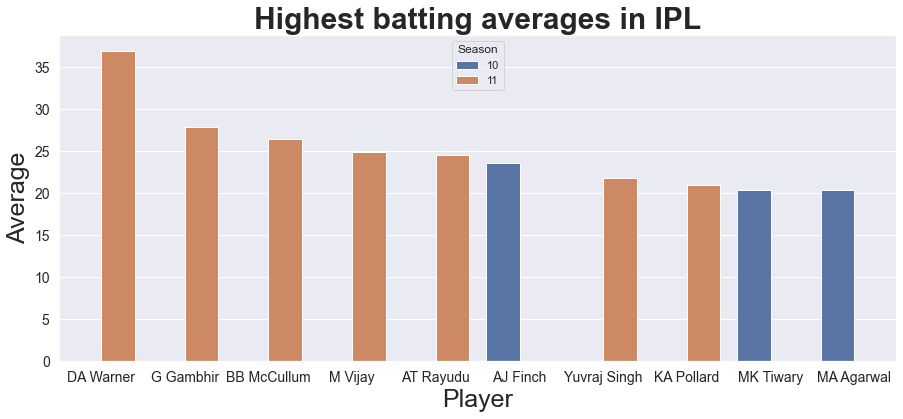

In [133]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='batting_average', data = highest_avg, hue = 'Season')
plt.title("Highest batting averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

In [134]:
#We will also consider batsmen in last 4 seasons who have had the best average

#Players with highest batting average in IPL who have played 10 or 11 seasons?
no_of_matches = pd.DataFrame(all_data[all_data.Season.isin([2015,2016,2017,2018])].groupby('batsman')['id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(all_data[all_data.Season.isin([2015,2016,2017,2018])].groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(all_data[all_data.Season.isin([2015,2016,2017,2018])].groupby('batsman')['Season'].nunique()) #season = 1 implies played only 1 season

batsman_df = pd.DataFrame({'match':no_of_matches['id'],'run':runs['batsman_runs'],'Season':seasons['Season']})
batsman_df.reset_index(inplace = True)

batsman_df['batting_average'] = batsman_df['run']/batsman_df['match']
highest_avg_last_4_seasons = batsman_df[['Season','batsman','batting_average','run']].sort_values(by = 'batting_average',
                                                                                        ascending = False)

highest_avg_last_4_seasons.head(10)

highest_avg_last_4_seasons.style.apply(lambda x: ['background: darkgreen' if x.name in [51,226,8,110,107,182] 
                              else '' for i in x], 
                   axis=1)

,Season,batsman,batting_average,run
49,3,DA Warner,45.577778,2051
226,4,V Kohli,41.357143,2316
7,4,AB de Villiers,37.920000,1896
75,2,HM Amla,36.062500,577
110,4,KS Williamson,35.812500,1146
107,3,KL Rahul,35.235294,1198
182,3,RR Pant,32.842105,1248
117,3,LMP Simmons,32.619048,685
39,3,CA Lynn,32.440000,811
167,3,Q de Kock,32.000000,768


# Batsmen with the best strike rates over the years

In [135]:
no_of_balls = pd.DataFrame(all_data.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(all_data.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(all_data.groupby('batsman')['Season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'Season':seasons['Season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.Season.isin([10,11])][['Season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,Season,batsman,strike_rate
220,11,KA Pollard,143.474134
116,11,DA Warner,137.575281
273,10,MA Agarwal,129.007634
77,11,BB McCullum,127.040141
462,10,STR Binny,125.714286
535,11,Yuvraj Singh,124.716553
37,10,AJ Finch,123.612824
55,11,AT Rayudu,123.198653
305,10,Mandeep Singh,121.627566
233,10,KM Jadhav,120.485744


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

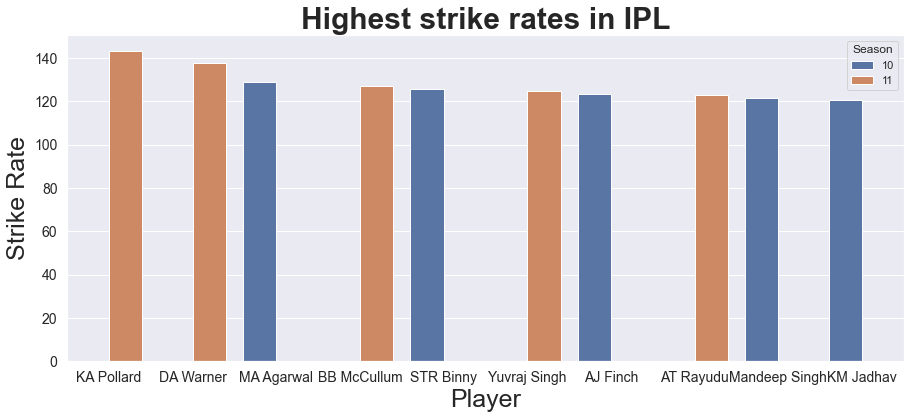

In [136]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'Season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Bowling Stat

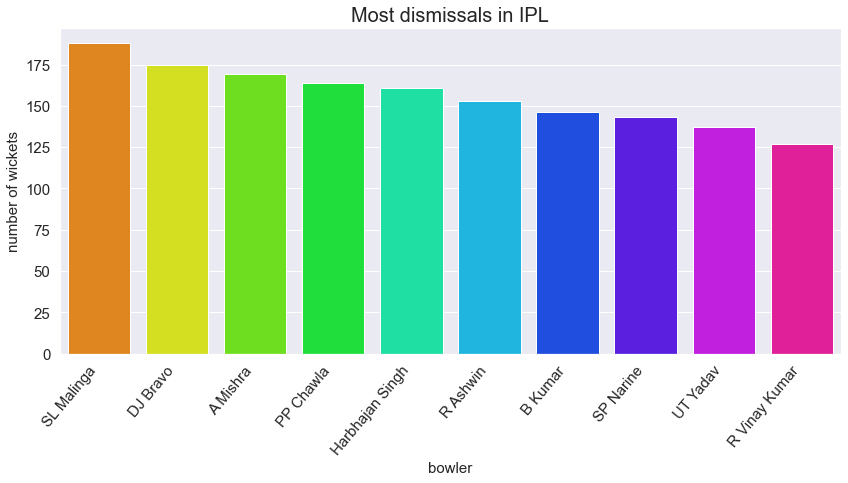

In [137]:
most_wickets=Ball_by_Ball[Ball_by_Ball['dismissal_kind'].notnull()]['bowler'].value_counts()
most_wickets=most_wickets.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='bowler',data=most_wickets[:10],palette='hsv')
plt.xlabel('bowler',fontsize=15)
plt.ylabel('number of wickets',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most dismissals in IPL',fontsize=20) 
plt.show()

### Which bowlers have performed well over last few seasons and can be considered further for upcoming auctions?

In [138]:
#We will consider the bowling average here for bowlers who have taken at least 50 wickets


In [139]:
runs_given = pd.DataFrame(all_data.groupby('bowler')['batsman_runs'].sum())
wickets_taken = pd.DataFrame(all_data[all_data['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(all_data.groupby('bowler')['Season'].nunique())
bowler_avg = pd.DataFrame({'runs':runs_given['batsman_runs'],'wickets':wickets_taken['dismissal_kind'],
                          'Season':seasons_played['Season']})
bowler_avg.reset_index(inplace = True)



bowler_avg['wickets'].dropna(axis = 0, inplace = True)

In [140]:
bowler_avg['bowling_average'] = bowler_avg['runs']/bowler_avg['wickets']
best_bowling_avg = bowler_avg[bowler_avg['wickets'] > 50].sort_values(by = 'bowling_average', ascending = True).head(10)

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

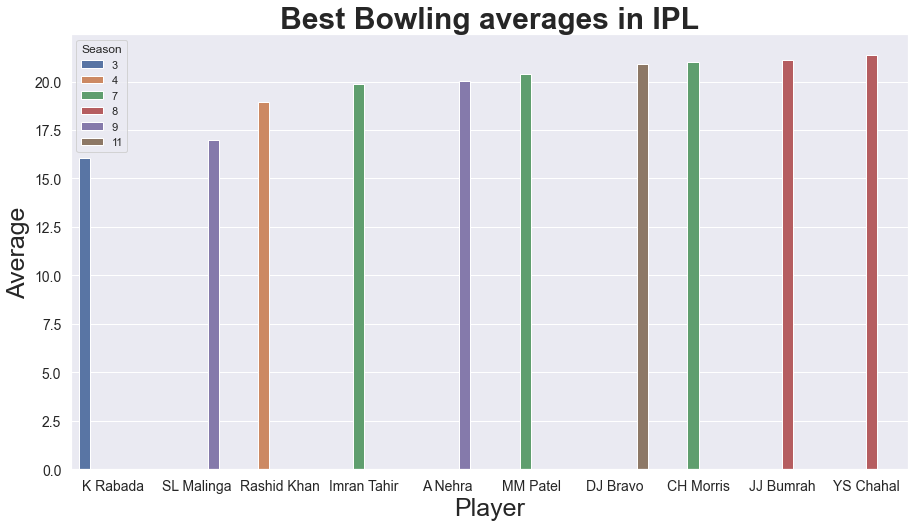

In [141]:
plt.figure(figsize = (15,8))
sns.barplot(x='bowler', y='bowling_average', data = best_bowling_avg, hue = 'Season')
plt.title("Best Bowling averages in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Average", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

Malinga has taken the most wickets at the best avg of 16.27.
Malinga, Narine, Zaheer Khan, Nehra have played 8 and above seasons and hence have taken more wickets and improved average

# CATCHES

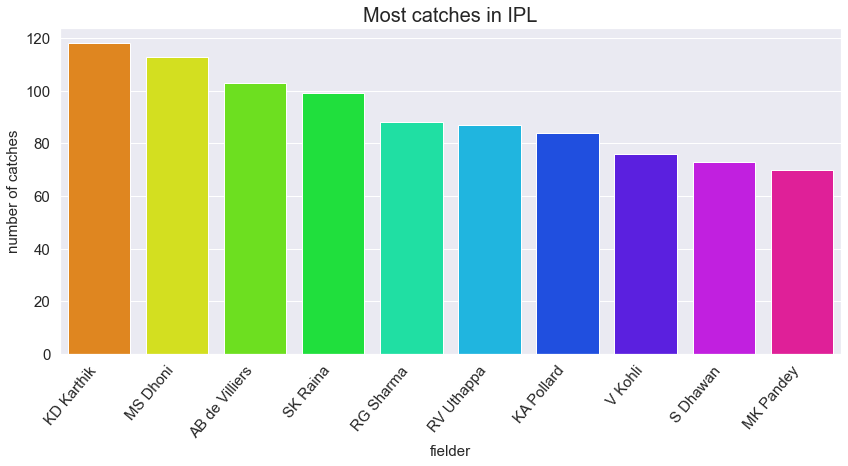

In [142]:
most_catches=Ball_by_Ball[Ball_by_Ball['dismissal_kind']=='caught']['fielder'].value_counts()
most_catches=most_catches.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_catches[:10],palette='hsv')
plt.xlabel('fielder',fontsize=15)
plt.ylabel('number of catches',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most catches in IPL',fontsize=20) 
plt.show()

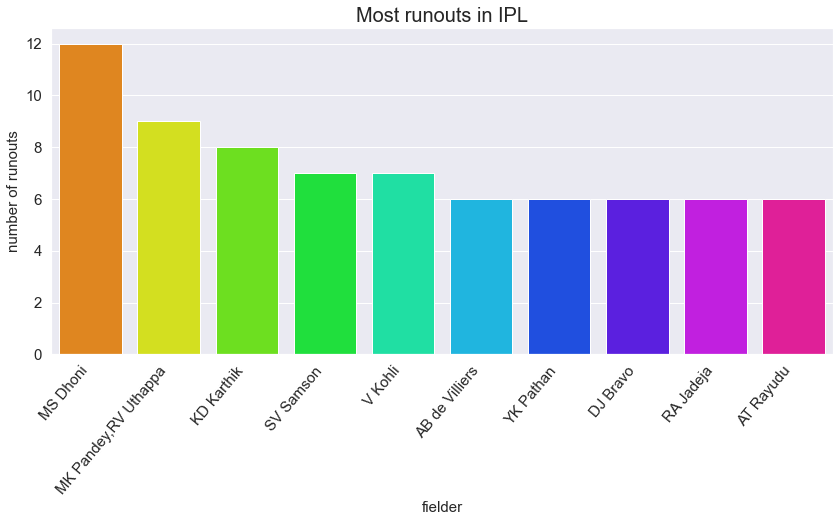

In [143]:
most_runouts=Ball_by_Ball[Ball_by_Ball['dismissal_kind']=='run out']['fielder'].value_counts()
most_runouts=most_runouts.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_runouts[:10],palette='hsv')
plt.xlabel('fielder',fontsize=15)
plt.ylabel('number of runouts',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most runouts in IPL',fontsize=20) 
plt.show()

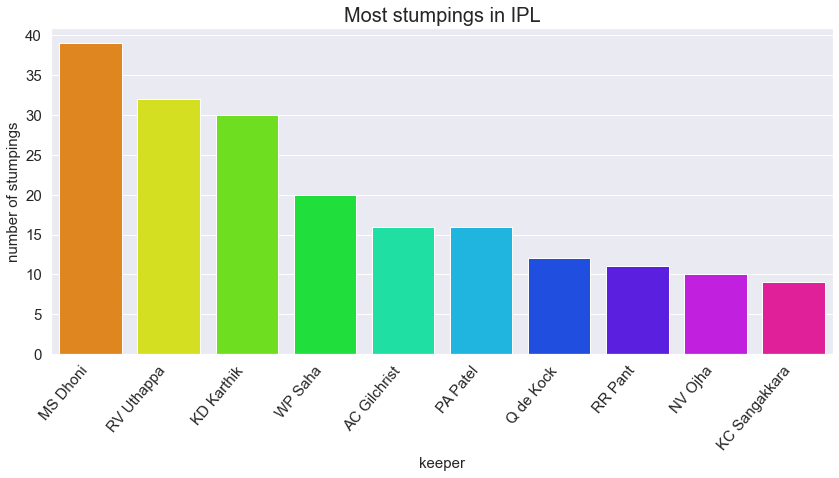

In [144]:
most_stumpings=Ball_by_Ball[Ball_by_Ball['dismissal_kind']=='stumped']['fielder'].value_counts()
most_stumpings=most_stumpings.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='index',y='fielder',data=most_stumpings[:10],palette='hsv')
plt.xlabel('keeper',fontsize=15)
plt.ylabel('number of stumpings',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most stumpings in IPL',fontsize=20) 
plt.show()

## Umpire Stat

In [145]:
df_umpire=matches[['umpire1','umpire2']]
df_umpire.dropna(inplace=True)
df_umpire

,umpire1,umpire2
0,Asad Rauf,RE Koertzen
1,MR Benson,SL Shastri
2,Aleem Dar,GA Pratapkumar
3,SJ Davis,DJ Harper
4,BF Bowden,K Hariharan
...,...,...
811,Nitin Menon,PR Reiffel
812,CB Gaffaney,Nitin Menon
813,PR Reiffel,S Ravi
814,PR Reiffel,S Ravi


In [146]:
df_umpire['umpire1'].value_counts()


HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
SS Hazare                11
S Das                    10
MR Benson                10
K Hariharan              10
DJ Harper                 9
UV Gandhe                 8
CK Nandan                 8
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
VK Sharma                 6
SD Fry              

In [147]:
df_umpire['umpire2'].value_counts()


S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
DJ Harper          18
RK Illingworth     18
HDPK Dharmasena    16
NJ Llong           16
CB Gaffaney        13
SL Shastri         13
K Srinath          13
K Hariharan        11
A Nand Kishore     11
S Asnani           11
BR Doctrove         8
PG Pathak           7
A Deshmukh          7
IL Howell           7
K Srinivasan        6
AL Hill             6
SS Hazare           6
I Shivram           6
GA Pratapkumar      6
S Das               5
TH Wijewardene      5
YC Barde            5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
Subroto Das         1
JD Cloete           1
SJ Davis  

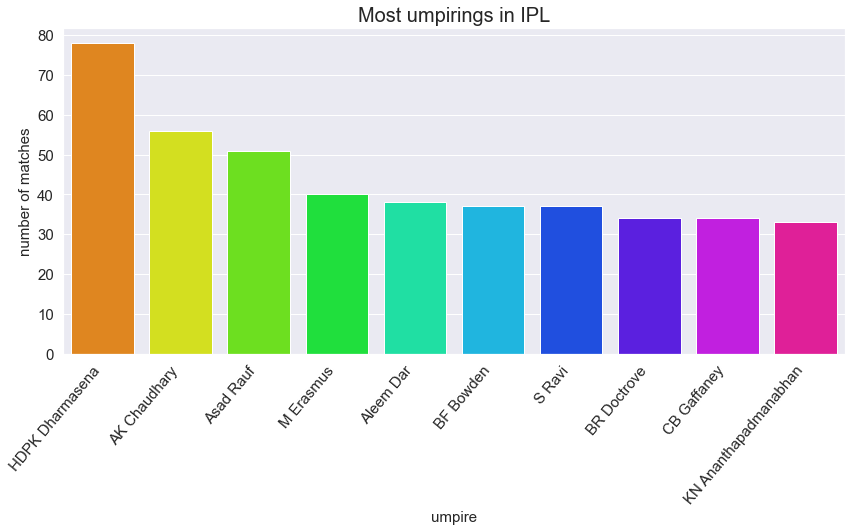

In [148]:
most_umpiring=df_umpire['umpire1'].value_counts()
most_umpiring=most_umpiring.to_frame().reset_index()
most_umpiring.columns=['umpire','count']

plt.figure(figsize=(14,6))
sns.barplot(x='umpire',y='count',data=most_umpiring[:10],palette='hsv')
plt.xlabel('umpire',fontsize=15)
plt.ylabel('number of matches',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most umpirings in IPL',fontsize=20) 
plt.show()

## Inferences and Conclusion


Let’s summarize the important observations we made during Exploratory Data Analysis:

‣ Mumbai Indians is the most successful team in IPL.

‣ Mumbai Indians has won the most number of toss.

‣ The probability of winning when the team had won the toss is approx 51%. 
  So winning toss gives a slight edge over the opponent.

‣ Win toss and field first so as to win more matches irrespective of venues.

‣ Seven Indian batsman have figured in the top ten IPL batsman list.

‣ AB de Villiers has won the maximum number of player of the match title.

‣During auctions,if franchise is looking for a consistent batsman, they can go for Raina

‣Go for pollard,warner,Rusell, Gayle, AB if looking for the big hitters who can also score a lot of runs

‣DA Warner has had the best average of 37 among all batsmen with more than 10 seasons
    
‣Malinga has been the most impressive bowler in IPL with more than 170 wickets at an average of 16.27, economy of 6.16  
‣If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then   Malinga could be a good option.
